### FIFA19 - Playing with dataset (Part 3)
Link to dataset: https://www.kaggle.com/karangadiya/fifa19

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('../data.csv')

df_group = df[['Nationality', 'ID', 'Age']].groupby('Nationality').agg({
    'ID': ['count'],
    'Age': ['mean', 'max', 'min']
})

df_group.columns = ['_'.join(col) for col in df_group.columns.values]

df_group.head()

,ID_count,Age_mean,Age_max,Age_min
Nationality,,,,
Afghanistan,4,22.500000,26,20
Albania,40,24.025000,34,18
Algeria,60,27.050000,35,19
Andorra,1,28.000000,28,28
Angola,15,25.866667,34,19


In [7]:
top_10_most_player = df_group.sort_values(by=['ID_count'], ascending=False)[:10]
top_10_most_player.head(10)

,ID_count,Age_mean,Age_max,Age_min
Nationality,,,,
England,1662,24.030084,44,16
Germany,1198,24.338063,39,17
Spain,1072,25.325560,39,16
Argentina,937,26.205977,41,16
France,914,24.615974,41,16
Brazil,827,27.625151,40,17
Italy,702,25.928775,40,17
Colombia,618,25.241100,40,16
Japan,478,26.158996,42,17


In [8]:
top_10_most_player = top_10_most_player.reset_index()
top_10_most_player.head(10)

,Nationality,ID_count,Age_mean,Age_max,Age_min
0,England,1662,24.030084,44,16
1,Germany,1198,24.338063,39,17
2,Spain,1072,25.325560,39,16
3,Argentina,937,26.205977,41,16
4,France,914,24.615974,41,16
5,Brazil,827,27.625151,40,17
6,Italy,702,25.928775,40,17
7,Colombia,618,25.241100,40,16
8,Japan,478,26.158996,42,17
9,Netherlands,453,24.000000,40,16


In [9]:
age_max = top_10_most_player['Age_max'].values
print(age_max)

[44 39 39 41 41 40 40 40 42 40]


In [10]:
age_min = top_10_most_player['Age_min'].values
print(age_min)

[16 17 16 16 16 17 17 16 17 16]


In [12]:
age_mean = top_10_most_player['Age_mean'].round(2).values
print(age_mean)

[24.03 24.34 25.33 26.21 24.62 27.63 25.93 25.24 26.16 24.  ]


In [14]:
nationality = top_10_most_player['Nationality'].apply(lambda x: x[:3]).values
print(nationality)

['Eng' 'Ger' 'Spa' 'Arg' 'Fra' 'Bra' 'Ita' 'Col' 'Jap' 'Net']


In [15]:
ind = np.arange(len(age_max))
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
width = 0.20

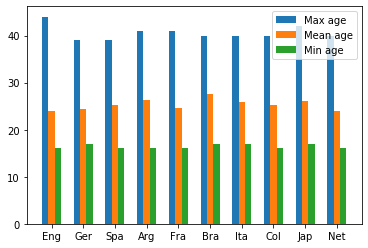

In [27]:
fig, ax = plt.subplots()
resualt_max = ax.bar(ind-width, age_max, width, label='Max age')
resualt_mean = ax.bar(ind, age_mean, width, label='Mean age')
resualt_min = ax.bar(ind+width, age_min, width, label='Min age')

ax.set_xticks(ind)
ax.set_xticklabels(nationality)
ax.legend()